# Octave + Jupyter Examples

* Exercises to run Octave in Jupyter that are aligned with signal processing at the SEA project group

In [2]:
pkg load signal

Link for the example below: https://octave.sourceforge.io/signal/function/gauspuls.html

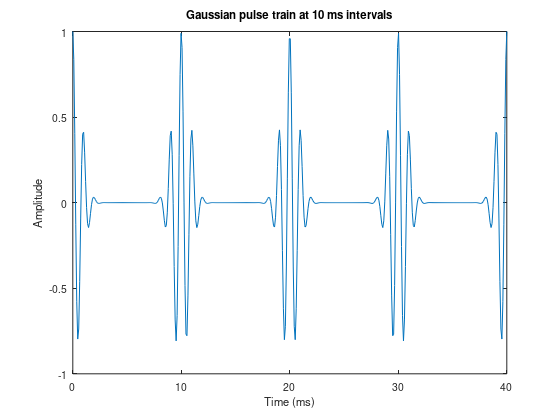

In [3]:
 fs = 11025;  # arbitrary sample rate
 f0 = 100;    # pulse train sample rate
 x = pulstran (0:1/fs:4/f0, 0:1/f0:4/f0, "gauspuls");
 plot ([0:length(x)-1]*1000/fs, x);
 xlabel ("Time (ms)");
 ylabel ("Amplitude");
 title ("Gaussian pulse train at 10 ms intervals");

* Below, more examples for generating pulse train

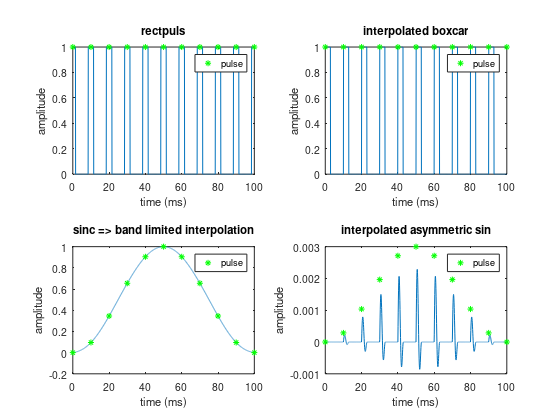

In [4]:
fs = 11025;                   # arbitrary sample rate
 f0 = 100;                     # pulse train sample rate
 w = 0.003;                    # pulse width of 3 milliseconds
 t = 0:1/fs:0.1; d=0:1/f0:0.1; # define sample times and pulse times
 a = hanning(length(d));       # define pulse amplitudes

 subplot(221);
 x = pulstran(t', d', 'rectpuls', w);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,ones(size(d)),'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("rectpuls");

 subplot(223);
 x = pulstran(f0*t, [f0*d', a], 'sinc');
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,a,'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("sinc => band limited interpolation");

 subplot(222);
 pulse = boxcar(30);  # pulse width of 3 ms at 10 kHz
 x = pulstran(t, d', pulse, 10000);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,ones(size(d)),'g*;pulse;'); hold off;
 ylabel("amplitude"); xlabel("time (ms)");
 title("interpolated boxcar");

 subplot(224);
 pulse = sin(2*pi*[0:0.0001:w]/w).*[w:-0.0001:0];
 x = pulstran(t', [d', a], pulse', 10000);
 plot([0:length(x)-1]*1000/fs, x);
 hold on; plot(d*1000,a*w,'g*;pulse;'); hold off; title("");
 ylabel("amplitude"); xlabel("time (ms)");
 title("interpolated asymmetric sin");

 %----------------------------------------------------------
 % Should see (1) rectangular pulses centered on *,
 %            (2) rectangular pulses to the right of *,
 %            (3) smooth interpolation between the *'s, and
 %            (4) asymmetric sines to the right of *